In [ ]:
import os
filename = 'AllPublicnew.sdf'
filepath = f'{filename}'

download_url = f'https://zenodo.org/records/3540701/files/{filename}'

if not os.path.exists(filepath):
    !wget {download_url} -O {filepath}
else:
    print("File already exists:", filepath)

--2024-02-08 04:33:58--  https://zenodo.org/records/3540701/files/AllPublicnew.sdf
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5760487 (5.5M) [application/octet-stream]
Saving to: ‘AllPublicnew.sdf’

AllPublicnew.sdf    100%[===================>]   5.49M  4.49MB/s    in 1.2s    

2024-02-08 04:34:00 (4.49 MB/s) - ‘AllPublicnew.sdf’ saved [5760487/5760487]



In [ ]:
!pip install jaqpotpy
!pip install rdkit
!pip install torch-geometric

# !pip install jaqpotpy
# !pip install rdkit

!pip install scikit-learn
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 498.0 kB/s eta 0:0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.7 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

def class_balanced_random_split(X, y, seed=None, test_ratio_per_class=0.15):
    """
    Class-balanced dataset split into train and test partitions.

    Args:
        idx2label (list): List of labels in the order they appear in the dataset
        seed (int, optional): Random seed (Default: None)
        test_ratio_per_class (float, optional): Percentage of test samples per class (Default: 0.15)

    Returns:
        (tuple):
            * train_indices (list): list of the indices of the train samples
            * test_indices (list): list of the indices of the test samples
    """

    class_indices = {}
    for idx, label in enumerate(y):
        if label not in class_indices:
            class_indices[label] = []
        class_indices[label].append(idx)


    train_indices = []
    test_indices = []
    for label, indices in class_indices.items():
        if len(indices) > 1:
            train_idx, test_idx = train_test_split(indices, test_size=test_ratio_per_class, random_state=seed)
        else:
            train_idx, test_idx = indices.copy(), []
        train_indices.extend(train_idx)
        test_indices.extend(test_idx)

    X_train = [X[i] for i in train_indices]
    y_train = [y[i] for i in train_indices]

    X_test = [X[i] for i in test_indices]
    y_test = [y[i] for i in test_indices]


    return X_train, X_test, y_train, y_test

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from pathlib import Path


working_dir = Path.cwd()
filename = 'AllPublicnew.sdf'

dataset_filepath = working_dir/filename


X, y = [], []
sdf_supplier = Chem.SDMolSupplier(str(dataset_filepath))

for mol in sdf_supplier:
    if mol is not None:
        smiles = mol.GetProp('SMILES')
        # smiles = Chem.MolToSmiles(mol)
        ready_biodegradability = int(mol.GetProp('ReadyBiodegradability'))

        X.append(smiles)
        y.append(ready_biodegradability)

In [ ]:
import numpy as np

n_all = len(y)
print(f"Whole Dataset ({100*(np.array(y)==1).sum()/n_all:.1f}% positive):")
print(f"- Positive Samples: {(np.array(y)==1).sum():,}")
print(f"- Negative Samples: {(np.array(y)==0).sum():,}")
print('\n')

# TODO: Need oversampling on train data AFTER spliting on train-validtaion as well

# Create test split
X_train_val, X_test, y_train_val, y_test = class_balanced_random_split(X, y)

# Create train and validation splits
X_train, X_val, y_train, y_val = class_balanced_random_split(X_train_val, y_train_val)


n_train = len(y_train)
print(f"Train Split ({100*(np.array(y_train)==1).sum()/n_train:.1f}% positive):")
print(f"- Positive Train Samples: {(np.array(y_train)==1).sum():,}")
print(f"- Negative Train Samples: {(np.array(y_train)==0).sum():,}")
print('\n')

n_val = len(y_val)
print(f"Validation Split ({100*(np.array(y_val)==1).sum()/n_val:.1f}% positive):")
print(f"- Positive Validation Samples: {(np.array(y_val)==1).sum():,}")
print(f"- Negative Validation Samples: {(np.array(y_val)==0).sum():,}")
print('\n')



n_test = len(y_test)
print(f"Test Split ({100*(np.array(y_test)==1).sum()/n_test:.1f}% positive):")
print(f"- Positive Test Samples: {(np.array(y_test)==1).sum():,}")
print(f"- Negative Test Samples: {(np.array(y_test)==0).sum():,}")
print('\n')

Whole Dataset (35.5% positive):
- Positive Samples: 1,133
- Negative Samples: 2,059


Train Split (35.5% positive):
- Positive Train Samples: 818
- Negative Train Samples: 1,487


Validation Split (35.5% positive):
- Positive Validation Samples: 145
- Negative Validation Samples: 263


Test Split (35.5% positive):
- Positive Test Samples: 170
- Negative Test Samples: 309




### Structural data of the dataset for graph node feature creation

In [ ]:
from rdkit import Chem
Symb , Hs , Impv , Fc , Hb , ExpV , Deg = set() , set() , set() , set() , set() , set() , set()
bond_type , conj = set() , set()

for smile in X:
  for atom in Chem.MolFromSmiles(smile).GetAtoms():

    Symb.add(atom.GetSymbol())
    Hs.add(atom.GetTotalNumHs())
    Impv.add(atom.GetImplicitValence())
    Fc.add(atom.GetFormalCharge())
    Hb.add(atom.GetHybridization())
    ExpV.add(atom.GetExplicitValence())
    Deg.add(atom.GetDegree())

  for bond in Chem.MolFromSmiles(smile).GetBonds():

    bond_type.add(bond.GetBondType())
    conj.add(bond.GetIsConjugated())
print(Symb ,'\n', Hs,'\n' , Impv,'\n' , Fc,'\n', Hb,'\n' , ExpV,'\n' , Deg)
print(bond_type,conj)

{'C', 'O', 'N', 'S', 'Cu', 'B', 'Br', 'I', 'Bi', 'P', 'Sn', 'F', 'Si', 'Cl'} 
 {0, 1, 2, 3, 4} 
 {0, 1, 2, 3, 4} 
 {0, 1, -1} 
 {rdkit.Chem.rdchem.HybridizationType.SP, rdkit.Chem.rdchem.HybridizationType.SP2, rdkit.Chem.rdchem.HybridizationType.SP3, rdkit.Chem.rdchem.HybridizationType.SP3D2} 
 {0, 1, 2, 3, 4, 5, 6} 
 {0, 1, 2, 3, 4}
{rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.DOUBLE, rdkit.Chem.rdchem.BondType.TRIPLE, rdkit.Chem.rdchem.BondType.AROMATIC} {False, True}


### Create the graph datasets

In [ ]:
from rdkit import Chem

def one_of_k_encoding(x,allowable_set):
    if x not in allowable_set:
        raise Exception(f'input{x} not in allowable set{allowable_set}')
    return list(map(lambda s: x == s , allowable_set))

def one_of_k_encoding_unk(x,allowable_set):
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x==s, allowable_set))

Symbols = list(Symb)

Degree = list(Deg)
Hs_Atoms = list(Hs)
Implicit_Val = list(Impv)
Formal_Charge = list(Fc)
Explicit_Val = list(ExpV)
Hybridization = list(Hb)

def atom_feature(atom):
    return torch.tensor(one_of_k_encoding_unk(atom.GetSymbol(),Symbols) +
                        one_of_k_encoding(atom.GetTotalNumHs() , Hs_Atoms) +
                        one_of_k_encoding(atom.GetDegree(), Degree) +
                        one_of_k_encoding(atom.GetImplicitValence(), Implicit_Val) +
                        one_of_k_encoding(atom.GetFormalCharge(), Formal_Charge) +
                        one_of_k_encoding(atom.GetHybridization(), Hybridization) +
                        one_of_k_encoding(atom.GetExplicitValence(), Explicit_Val) +
                        [atom.GetIsAromatic()],dtype = torch.int16)

In [ ]:
from torch_geometric.data import Data

def nodes_and_adjacency(smile,y):

    mol = Chem.MolFromSmiles(smile)
    # Create node Features
    feats = []
    attr = []
    for atom in mol.GetAtoms():
        feats.append(atom_feature(atom)) # Get the 5 feats in a single atom of a mol
    mol_node_features = torch.stack(feats).float() # Stack them in an array [num_nodes x atom_features]

    # Create Adjacency Matrix
    ix1 , ix2 = [] , []

    for bond in mol.GetBonds():

        start , end = bond.GetBeginAtomIdx() , bond.GetEndAtomIdx()
        ix1 += [start,end]
        ix2 += [end, start]

    adj_norm = torch.asarray([ix1,ix2],dtype = torch.int64) # Needs to be in COO Format

    return Data(x = mol_node_features,
                edge_index = adj_norm,
                y = y)

In [ ]:
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
import torch

class GraphDataset(Dataset):

    def __init__(self,smiles,y):
        super(GraphDataset,self).__init__()

        dataset_info = [nodes_and_adjacency(smile,y) for smile,y in (zip(smiles,y))]

        self.df = [info for info in dataset_info]

    def __getitem__(self,idx):
        return self.df[idx]

    def __len__(self):
        return len(self.df)

train_dataset = GraphDataset(X_train,y_train).df
val_dataset = GraphDataset(X_val,y_val).df
test_dataset = GraphDataset(X_test,y_test).df

### Create class of GCN Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv
from torch_geometric.nn import global_add_pool, global_mean_pool

class GCN(nn.Module):

    def __init__(self,in_neurons,hid_layers,neurons):
        super(GCN,self).__init__()
        torch.manual_seed(42)

        self.hid_layers = hid_layers
        self.layers = nn.ModuleList()

        self.layers.append(GCNConv(in_neurons,neurons))

        for i in range(1 ,hid_layers):

            self.layers.append(GCNConv(neurons,neurons))

        self.lin = nn.Linear(neurons,1)

    def forward(self, x, edge_index, batch):

      for i, layer in enumerate(self.layers):

          x = layer(x, edge_index)
          x = F.relu(x)
          x = F.dropout(x,p=0.2 ,training=self.training)

      x = global_mean_pool(x, batch)
      x = self.lin(x)
      x = F.sigmoid(x)

      return x

class GAT(nn.Module):

    def __init__(self,in_neurons,hid_layers,neurons,heads):
        super(GAT,self).__init__()
        torch.manual_seed(42)

        self.hid_layers = hid_layers
        self.layers = nn.ModuleList()
        self.heads = heads
        self.layers.append(GATConv(in_neurons,neurons,heads=self.heads))

        for i in range(1 ,hid_layers):

            self.layers.append(GATConv(neurons*self.heads,neurons,heads=self.heads))

        self.lin = nn.Linear(self.heads*neurons,1)

    def forward(self, x, edge_index, batch):

      for i, layer in enumerate(self.layers):

          x = layer(x, edge_index)
          x = F.relu(x)
          x = F.dropout(x,p=0.2 ,training=self.training)

      x = global_mean_pool(x, batch)
      x = self.lin(x)
      x = F.sigmoid(x)

      return x

### Create Dataloaders

In [ ]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)
val_loader = DataLoader(dataset=val_dataset,batch_size=64,shuffle=True)

### Select loss function and optimizer

In [ ]:
import torch
import torch.nn.functional as F

#model = GCN(44,2,30)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
#loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
import torch

model = GAT(44,2,30,8)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
loss_fn = torch.nn.BCEWithLogitsLoss()

epochs = 100
total_train_loss = []
total_val_loss = []
for epoch in range(1,epochs+1):
  model.train()
  loss1 = 0
  loss2 = 0
  for data in train_loader:
    x, edge_index, batch = data.x, data.edge_index, data.batch
    pred = model(x,edge_index,batch)
    optimizer.zero_grad()
    train_loss = loss_fn(pred.float(),data.y.unsqueeze(dim=1).float())
    train_loss.backward()
    optimizer.step()

    loss1 += train_loss.item() * 16
  model.eval()

  with torch.no_grad():

    for data in val_loader:
      x, edge_index, batch = data.x, data.edge_index, data.batch
      pred = model(x,edge_index,batch)
      test_loss = loss_fn(pred.float(),data.y.unsqueeze(dim=1).float())

      loss2 += test_loss.item() * 16

  print(loss1/(len(train_loader.dataset)), '  ', loss2/(len(val_loader.dataset)) ,'  ' ,  epoch)
  total_train_loss.append(loss1/(len(train_loader.dataset)))
  total_val_loss.append(loss2/(len(val_loader.dataset)))
  #print(train_loss.item(), '  ', test_loss.item() ,'  ' ,  epoch)

0.19651233606897053    0.1979911584480136    1
0.18057142203904025    0.19078495689466887    2
0.17823977604863958    0.19028125790988698    3
0.17789682773085322    0.19000536320256253    4
0.17753879646417117    0.1901776346505857    5
0.17583571700884307    0.18890083303638533    6
0.1724244694906305    0.18841358960843554    7
0.17296260659968776    0.18522855814765482    8
0.17089612302966334    0.18281162486356847    9
0.168925624607442    0.18240545543969847    10
0.16836797916966767    0.18201688224194096    11
0.16769996982334492    0.18026085694630942    12
0.16666196090797541    0.17947808200237797    13
0.16892054220600913    0.18126308684255563    14
0.16753279299125753    0.1803371742659924    15
0.16684131539566138    0.17975340637506224    16
0.16674701748597648    0.17959136355156993    17
0.1660554376962128    0.18068915254929485    18
0.16594491077348622    0.17981783548990884    19
0.16592595478976369    0.17985834794885971    20
0.1657270332220578    0.179474996585

KeyboardInterrupt: 

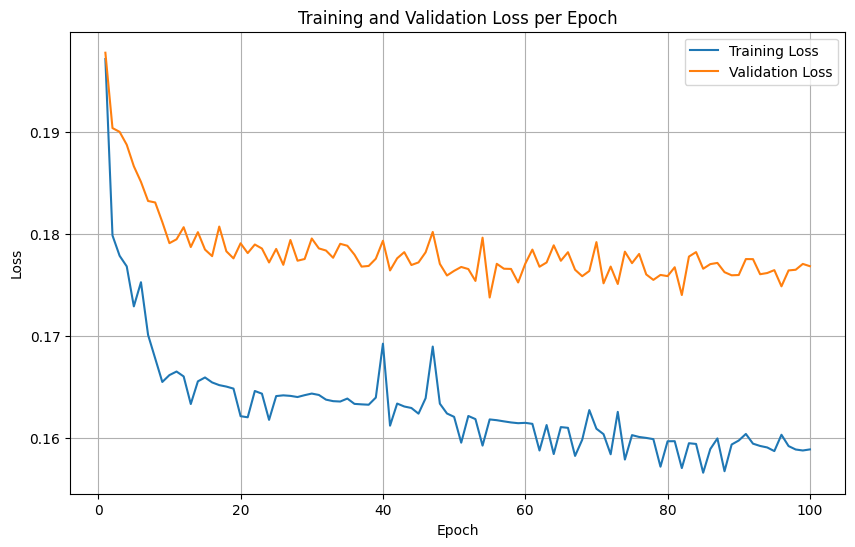

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, len(total_train_loss) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, total_train_loss, label='Training Loss')
plt.plot(epochs, total_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim(0.3,0.4)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bio_preds = []
for test in test_dataset:
  pred = model(test.x,test.edge_index,test.batch)
  bio_preds += pred

In [ ]:
predicts = []
for bio in bio_preds:
  if bio > 0.5:
    predicts.append(1)
  else:
    predicts.append(0)

In [ ]:
true_values = []
for t in test_dataset:
  true_values.append(t.y)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

cf = confusion_matrix(true_values,predicts)
f1 = f1_score(true_values,predicts)
accuracy = accuracy_score(true_values,predicts)

In [ ]:
print(accuracy)
print(cf)

0.8475991649269311
[[288  21]
 [ 52 118]]
